# Лабораторна робота №3 з Видобування даних
## Очищення даних
### Мета роботи: навчитися базовому фунукціоналу pandas для обробки та підготовки даних до моделювання та використання

###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame 

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/brych126/DataMining/main/movies3.csv'
dataset = pd.read_csv(url, encoding='latin-1')
dataset.head() 


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


###2.Видаліть ті колонки які вам не потрібні для подальшого аналізу, залишивши ті що ви вибрали в рамках 2 лабораторної роботи ( df.drop )


In [ ]:
dataset = dataset.drop(columns=['rating', 'writer'])
dataset.head()


,budget,company,country,director,genre,gross,name,released,runtime,score,star,votes,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,8/22/1986,89,8.1,Wil Wheaton,299174,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,6/11/1986,103,7.8,Matthew Broderick,264740,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,5/16/1986,110,6.9,Tom Cruise,236909,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,7/18/1986,137,8.4,Sigourney Weaver,540152,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,8/1/1986,90,6.9,Joey Cramer,36636,1986


###3.Скільки % записів у ваших колонках є пусті / null ? Вивдеіть для кожного стовпця відсоток таких записів (df.isnull) Якщо таких записів більше 50% - вартує видалити такий стовпець чи ні ? Якщо так - видаліть.
 

In [ ]:
total_rows = len(dataset['name'])
pd.isnull(dataset).sum().to_frame('Nulls percentage')/total_rows*100

,Nulls percentage
budget,0.0
company,0.0
country,0.0
director,0.0
genre,0.0
gross,0.0
name,0.0
released,0.0
runtime,0.0
score,0.0



###4.Перевірте свої записи на дублікати . Якщо такі є - це помилкові записи чи подібні але окремі ? (df.duplicated) Чи є у вас колонки з різними назвами але які містять одинакову інформацію ?


In [ ]:
duplicates_total = dataset[dataset.duplicated()]
duplicates_names = dataset[dataset.duplicated(['name'])]
duplicates_coordinates=dataset[dataset.duplicated(['name','director'])]
duplicates_names


,budget,company,country,director,genre,gross,name,released,runtime,score,star,votes,year
1652,0,PolyGram Filmed Entertainment,USA,Nicholas Kazan,Drama,256264,Dream Lover,5/6/1994,103,6.2,James Spader,3327,1993
1730,9000000,StudioCanal,USA,James B. Harris,Action,10058318,Boiling Point,4/16/1993,92,4.9,Wesley Snipes,4831,1993
1866,20000000,Capella International,USA,Robert Benton,Comedy,39487686,Nobody's Fool,1/13/1995,110,7.4,Paul Newman,15759,1994
1984,60000000,Warner Bros.,USA,Michael Mann,Action,67436818,Heat,12/15/1995,170,8.2,Al Pacino,470080,1995


###5.Чи є у вас помилки у назвах колонок - якщо так виправте перейменувавши їх



###6.Перегляньти значення категорій якщо стовпці з такими даними є. Чи вони справді унікальні чи є помилкові дублікати ? ( приклади: model i Model , NA i NotAssesed, New-York i New York )




In [ ]:
print('Genres:', dataset['genre'].unique())
print('\nCountry:', dataset['country'].unique())
# print('\nCompanies:', dataset['company'].unique())
# print('\nDirectors:', dataset['director'].unique())
# print('\nStars:', dataset['star'].unique())


Genres: ['Adventure' 'Comedy' 'Action' 'Drama' 'Crime' 'Thriller' 'Horror'
 'Animation' 'Biography' 'Sci-Fi' 'Musical' 'Family' 'Fantasy' 'Mystery'
 'War' 'Romance' 'Western']

Country: ['USA' 'UK' 'Australia' 'Italy' 'France' 'Sweden' 'Japan' 'Spain'
 'Switzerland' 'Canada' 'Israel' 'Netherlands' 'Argentina' 'Denmark'
 'West Germany' 'Hong Kong' 'Belgium' 'Ireland' 'South Africa' 'Hungary'
 'Iran' 'New Zealand' 'Germany' 'China' 'Peru' 'Soviet Union' 'Mexico'
 'Brazil' 'Taiwan' 'India' 'Austria' 'Portugal' 'Cuba'
 'Republic of Macedonia' 'Russia']


###7. В рамках 2 лабораторної чи у вас в даних є [outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) ? Якщо є - заберіть  той % або кількість яка у вашому випадку оптимальна



Number of rows before removing movies with zero budget: 1999
Number of rows after removing movies with zero budget: 991
Number of rows before removing outliers: 991
Number of rows after removing outliers: 796


,budget,company,country,director,genre,gross,name,released,runtime,score,star,votes,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,8/22/1986,89,8.1,Wil Wheaton,299174,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,6/11/1986,103,7.8,Matthew Broderick,264740,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,5/16/1986,110,6.9,Tom Cruise,236909,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,7/18/1986,137,8.4,Sigourney Weaver,540152,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,8/1/1986,90,6.9,Joey Cramer,36636,1986


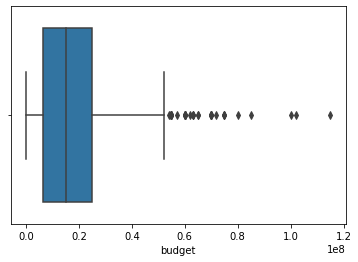

In [ ]:
#removing movies with budget equals to 0
print('\nNumber of rows before removing movies with zero budget:',len(dataset.index))
dataset = dataset.loc[dataset['budget'] != 0]
print('Number of rows after removing movies with zero budget:',len(dataset.index))
dataset.head()
#detect outliers
import seaborn as sns
sns.boxplot(x=dataset['budget'])
limit = 30000000
print('Number of rows before removing outliers:',len(dataset.index))
dataset = dataset.loc[dataset['budget'] < limit]
print('Number of rows after removing outliers:',len(dataset.index))
dataset.head()



###8.Чи є у вас колонки з непраивльними / пропущеними  значеннями ? Якщо так , тоді опрацюйте їх в [залежності від умови і типу даних](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)